<a href="https://colab.research.google.com/github/Kiichiro-T/python/blob/main/statistical_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# 標本データ
samples = [128.4, 135.9, 126.5, 182.4, 157.6, 100.6, 176.4, 126.6, 146.1, 138.0, 167.7, 128.1, 156.1, 183.5, 133.2, 162.4, 169.0, 161.6, 127.7, 154.3]

## 1. 母平均の信頼区間

In [ ]:
s2 = np.var(samples, ddof=1)
N = len(samples)
mean = np.mean(samples)
df = N - 1
se = np.sqrt(s2/N)

t = sp.stats.t.ppf(0.975, df)

x_low = mean - t * se
x_high = mean + t * se

# 母平均の95%信頼区間
# print(x_low, '≦µ≦', x_high)
print('手計算：　{:.2f} ≦ µ ≦ {:.2f}'.format(x_low, x_high))

bottom, up = sp.stats.t.interval(alpha=0.95, loc=mean, scale=se, df=df)
print('ライブラリ：　{:.2f} ≦ µ ≦ {:.2f}'.format(bottom, up))

手計算：　137.64 ≦ µ ≦ 158.57
ライブラリ：　137.64 ≦ µ ≦ 158.57


In [ ]:
alpha = [0.9, 0.95, 0.99]
for a in alpha:
  t = sp.stats.t.ppf(a, df)
  x_low = mean - t * se
  x_high = mean + t * se
  print('{:.2f}：　{:.2f} ≦ µ ≦ {:.2f}'.format(a, x_low, x_high))

0.90：　141.47 ≦ µ ≦ 154.74
0.95：　139.46 ≦ µ ≦ 156.75
0.99：　135.41 ≦ µ ≦ 160.80


## 2. 母分散の区間推定

In [ ]:
alpha = 0.05
chi2_1 = sp.stats.chi2.ppf(alpha/2, df)
chi2_2 = sp.stats.chi2.ppf(1-alpha/2, df)

theta_high = df * s2 / chi2_1
theta_low = df * s2 / chi2_2

print('手計算：　{:.2f} ≦ o2 ≦ {:.2f}'.format(theta_low, theta_high))

手計算：　289.08 ≦ o2 ≦ 1066.31


In [ ]:
alpha = [0.1, 0.05, 0.01, 0.001]
for a in alpha:
  chi2_1 = sp.stats.chi2.ppf(a/2, df)
  chi2_2 = sp.stats.chi2.ppf(1-a/2, df)
  x_high = df * s2 / chi2_1
  x_low = df * s2 / chi2_2
  print('{:.3f}：　{:.2f} ≦ o2 ≦ {:.2f}'.format(a, x_low, x_high))

0.100：　315.06 ≦ µ ≦ 938.73
0.050：　289.08 ≦ µ ≦ 1066.31
0.010：　246.15 ≦ µ ≦ 1387.66
0.001：　206.58 ≦ µ ≦ 1933.32


# 3. 母平均の検定

In [ ]:
# 両側検定
print('H_0: µ = 150')
print('H_1: µ ≠ 150')
print('α = 0.05')

mu = 150
t_a = abs(sp.stats.t.ppf(0.975, df))
t = abs((mean - mu) / se)
print(t, t_a)
if t > t_a:
  print('帰無仮説を棄却する')
else:
  print('帰無仮説を棄却しない')

H_0: µ = 150
H_1: µ ≠ 150
α = 0.05
0.3790576710291339 2.093024054408263
帰無仮説を棄却しない


In [ ]:
# 片側検定
print('H_0: µ = 150')
print('H_1: µ < 150')
print('α = 0.05')

mu = 160
t_a = sp.stats.t.ppf(0.950, df)
t = (mean - mu) / se
print(t, t_a)
if t < -t_a:
  print('帰無仮説を棄却する')
else:
  print('帰無仮説を棄却しない')

H_0: µ = 150
H_1: µ < 150
α = 0.05
-2.37936200363669 1.729132811521367
帰無仮説を棄却する


## 4. 母分散の検定

In [ ]:
# 両側検定
print('H_0: o2 = 500')
print('H_1: o2 ≠ 500')
print('α = 0.05')

alpha = 0.05
sigma2 = 500
chi2_1 = sp.stats.chi2.ppf(alpha/2, df)
chi2_2 = sp.stats.chi2.ppf(1-alpha/2, df)
chi2 = df * s2 / 500

print(chi2_1, chi2, chi2_2)

if chi2_1 < chi2 < chi2_2:
  print('帰無仮説を棄却しない')
else:
  print('帰無仮説を棄却する')

H_0: o2 = 500
H_1: o2 ≠ 500
α = 0.05
8.906516481987971 18.994219 32.85232686172969
帰無仮説を棄却しない


In [ ]:
# 片側検定
print('H_0: o2 = 500')
print('H_1: o2 < 500')
print('α = 0.05')

alpha = 0.05
sigma2 = 1000
chi2_1 = sp.stats.chi2.ppf(alpha, df)
chi2_2 = sp.stats.chi2.ppf(1-alpha, df)
chi2 = df * s2 / sigma2

print(chi2_1, chi2, chi2_2)

if chi2 < chi2_1:
  print('帰無仮説を棄却する')
else:
  print('帰無仮説を棄却しない')

H_0: o2 = 500
H_1: o2 < 500
α = 0.05
10.117013063859044 9.4971095 30.14352720564616
帰無仮説を棄却する


## 5. 対応のある2標本t検定

In [ ]:
# 投薬による血圧の変化ｒ
sample_list = [
         [1, 175, 150],
         [2, 125, 135],
         [3, 170, 145],
         [4, 155, 150],
         [5, 145, 140]
]
new_list = []
for i in range(len(sample_list)):
  new_list.append(sample_list[i][1] - sample_list[i][2])

s2 = np.var(new_list, ddof=1)
mean = np.mean(new_list)
N = len(new_list)
df = N - 1
se = np.sqrt(s2/N)
print(s2, mean, N,se)

print('H_0: µ = 0')
print('H_1: µ > 0')
print('α = 0.05')

t = (mean - 0) / se
t_a = sp.stats.t.ppf(0.950, df)
print(t, t_a)
if t > t_a:
  print('帰無仮説を棄却する')
else:
  print('帰無仮説を棄却しない')

225.0 10.0 5 6.708203932499369
H_0: µ = 0
H_1: µ > 0
α = 0.05
1.4907119849998598 2.13184678133629
帰無仮説を棄却しない


## 6. 対応のない2標本t検定（母分散が等しい）

In [ ]:
print('A組の生徒40人の平均点65点、不偏分散49')
print('B組の生徒43人の平均点70点、不偏分散100')
na, nb = 40, 43
mua, mub = 65, 70
s2a, s2b = 49, 100
df = na+nb-2
s2 = ((na-1)*s2a+(nb-1)*s2b)/df

t = (mua-mub)/(np.sqrt(s2 * (1/na + 1/nb)))
print(t)
print('両側検定')
t1 = sp.stats.t.ppf(0.975, df)
print(t1)
if abs(t) > t1:
  print('帰無仮説を棄却する')
else:
  print('帰無仮説を棄却しない')

print('片側検定')
t2 = sp.stats.t.ppf(0.05, df)
print(t2)
if t < t2:
  print('帰無仮説を棄却する')
else:
  print('帰無仮説を棄却しない')

A組の生徒40人の平均点65点、不偏分散49
B組の生徒43人の平均点70点、不偏分散100
-2.6204842221957914
両側検定
1.9896863232444828
帰無仮説を棄却する
片側検定
-1.663883912866253
帰無仮説を棄却する


## 7. 母分散の比の検定（F分布）

H_0: 母分散は等しい
H_1: 母分散は等しくない
α = 0.05


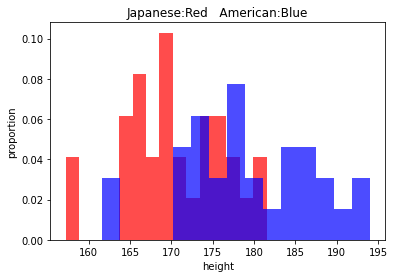

In [ ]:
# 日本人男性30人をサンプル
np.random.seed(1)
Japan = np.round([np.random.normal(171, 6, 30)],1).reshape(30)

# アメリカ人男性30人をサンプル
np.random.seed(1)
US = np.round([np.random.normal(180, 8, 30)],1).reshape(30)

df = 30 - 1
s2_j = np.var(Japan, ddof=1)
s2_u = np.var(US, ddof=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(Japan, bins=15, density=True, color='red', alpha=0.7)
ax.hist(US, bins=15, density=True, color='blue', alpha=0.7)
ax.set_title(('Japanese:Red   American:Blue'))
ax.set_xlabel('height')
ax.set_ylabel('proportion')
fig.show()

In [ ]:
print('H_0: 母分散は等しい')
print('H_1: 母分散は等しくない')
print('α = 0.05')

alpha = 0.05

f = s2_j / s2_u
f1 = sp.stats.f.ppf(alpha/2, df, df)
f2 = sp.stats.f.ppf(1-alpha/2, df, df)
print(f1, f2)

if f < f1 or f > f2:
  print('帰無仮説を棄却する（母分散は等しくない）')
else:
  print('帰無仮説を棄却しない（母分散は等しくないとは言えない）')

H_0: 母分散は等しい
H_1: 母分散は等しくない
α = 0.05
0.47596477431003137 2.100995817284212
帰無仮説を棄却しない（母分散は等しくないとは言えない）


In [ ]:
## 8. Welchの検定
A = np.array([13.8, 10.2, 4.6, 10.0, 4.2, 16.1, 14.4, 4.9, 7.7, 11.4])
B = np.array([3.3, 2.6, 4.0, 4.7, 1.9, 2.9, 4.7, 5.3, 4.3, 3.0, 2.0])

print('まずF検定によって等分散性の確認')
print('H_0: 母分散は等しい')
print('H_1: 母分散は等しくない')
print('α = 0.05')

s2_a = np.var(A, ddof=1)
s2_b = np.var(B, ddof=1)
n_a = len(A)
n_b = len(B)
df_a = n_a - 1
df_b = n_b - 1

f = s2_a / s2_b
f1 = sp.stats.f.ppf(alpha/2, df_a, df_b)
f2 = sp.stats.f.ppf(1-alpha/2, df_a, df_b)

if f < f1 or f > f2:
  print('帰無仮説を棄却する（母分散は等しくない）')
else:
  print('帰無仮説を棄却しない（母分散は等しくないとは言えない）')

print('次にWelchのt検定')
print('H_0: 平均は等しい')
print('H_1: 平均は等しくない')
print('α = 0.05')

mean_a = np.mean(A)
mean_b = np.mean(B)

t = (mean_a - mean_b) / np.sqrt(s2_a/n_a+s2_b/n_b)
nu = (s2_a/n_a+s2_b/n_b)**2/((s2_a/n_a)**2/df_a+(s2_b/n_b)**2/df_b)
print('ν =', nu)
nu_asterisk = 10
t_a = sp.stats.t.ppf(0.975, nu_asterisk)

if abs(t) > t_a:
  print('帰無仮説を棄却する（母平均は等しくない、差がある）')
else:
  print('帰無仮説を棄却しない（母平均は等しくないとは言えない）')

まずF検定によって等分散性の確認
H_0: 母分散は等しい
H_1: 母分散は等しくない
α = 0.05
帰無仮説を棄却する（母分散は等しくない）
次にWelchのt検定
H_0: 平均は等しい
H_1: 平均は等しくない
α = 0.05
ν = 10.174492620405424
帰無仮説を棄却する（母平均は等しくない、差がある）


## 8. 一元配置分散分析

In [ ]:
print('因子： 学校、水準： A校, B校, C校, D校')
A = np.array([66, 62, 80, 50, 57, 68, 73, 65])
B = np.array([62, 60, 66, 63, 55, 53, 59, 63])
C = np.array([65, 60, 78, 52, 59, 66, 73, 64])
D = np.array([52, 59, 44, 67, 47, 53, 58, 49])

data = pd.DataFrame({'A':A, 'B':B, 'C':C, 'D':D})
data

因子： 学校、水準： A校, B校, C校, D校


,A,B,C,D
0,66,62,65,52
1,62,60,60,59
2,80,66,78,44
3,50,63,52,67
4,57,55,59,47
5,68,53,66,53
6,73,59,73,58
7,65,63,64,49


In [ ]:
print('H_0: すべての水準で平均が等しく、水準による効果が0である')
print('H_1: 平均が一般平均と等しくなく、効果が0でない水準が存在する')
print('α = 0.05')

# 全体の標本平均
y = data.stack().mean()

# 水準ごとの標本平均
y_a = data['A'].mean()
y_b = data['B'].mean()
y_c = data['C'].mean()
y_d = data['D'].mean()
y_i = {'A':y_a, 'B':y_b, 'C':y_c, 'D':y_d}

# 全平方和, 群間平方和
S_t = 0
S_a = 0
for i in ['A', 'B', 'C', 'D']:
  S_a += 8 * ((y_i[i]-y)**2)
  for j in range(8):
    S_t += (y - data[i][j])**2

# 群内平方和
S_r = S_t - S_a

# 自由度
phi_a = 4 -1
phi_r = 32 - 4
phi_t = 32 - 1

# 分散
V_a = S_a / phi_a
V_r = S_r / phi_r

# F値
f = V_a / V_r

S = [S_a, S_r, S_t]
phi = [phi_a, phi_r, phi_t]
V = [V_a, V_r, None]
F = [f, None, None]
anova_table = pd.DataFrame({'平方和':S,
                      '自由度':phi,
                      '分散':V,
                      'F値':F})
anova_table.index = ['群間', '群内', '計']

alpha = 0.05
f_a = sp.stats.f.ppf(alpha, phi_a, phi_r)
print(f, f_a)

if f > f_a:
  print('帰無仮説を棄却する（有意水準5%で異なる水準の異なる効果を認められる）')
  print('つまり学校の違いがテストの得点に影響を及ぼす可能性がある。')
else:
  print('帰無仮説を棄却しない（有意水準5%で異なる水準の異なる効果を認められないとはいえない）')

H_0: すべての水準で平均が等しく、水準による効果が0である
H_1: 平均が一般平均と等しくなく、効果が0でない水準が存在する
α = 0.05
4.024870903151017 0.11597074260606918
帰無仮説を棄却する（有意水準5%で異なる水準の異なる効果を認められる）
つまり学校の違いがテストの得点に影響を及ぼす可能性がある。


In [ ]:
anova_table

,平方和,自由度,分散,F値
群間,682.0,3,227.333333,4.024871
群内,1581.5,28,56.482143,NaN
計,2263.5,31,NaN,NaN


In [ ]:
print('y_i:', y_i)
print('この特性値が「値が大きいほど望ましい」のであれば、最適な水準はA校である。')
print('A校の平均値y_aの信頼度95%の信頼限界は')
t_a = sp.stats.t.ppf(0.975, 8)
# print(t_a*np.sqrt(V_a/8))
print('{:.2f} ± {:.2f}'.format(y_a, t_a*np.sqrt(V_a/8)))

y_i: {'A': 65.125, 'B': 60.125, 'C': 64.625, 'D': 53.625}
この特性値が「値が大きいほど望ましい」のであれば、最適な水準はA校である。
A校の平均値y_aの信頼度95%の信頼限界は
65.12 ± 12.29


## 9. 適合度の検定

In [ ]:
A = np.array([53,40])
B = np.array([18, 20])
O = np.array([24, 30])
AB = np.array([5, 10])

data = pd.DataFrame({'A':A, 'B':B, 'O':O, 'AB':AB})
data.index = ['観測度数', '期待度数']
data

,A,B,O,AB
観測度数,53,18,24,5
期待度数,40,20,30,10


In [ ]:
print('H_0: 実測値の分布と理論値の分布は一致する')
print('H_1: 実測値の分布と理論値の分布は一致しない')
print('α = 0.05')
alpha = 0.05

chi2 = 0
for i in ['A', 'B', 'O', 'AB']:
  fi = data[i]['観測度数']
  ei = data[i]['期待度数']
  chi2 += (fi - ei)**2 / ei

df = 4 - 1
chi2_a = sp.stats.chi2.ppf(1-alpha, df)

if chi2 > chi2_a:
  print('帰無仮説を棄却する（実測値の分布と理論値の分布は一致しない）')
else:
  print('帰無仮説を棄却しない（実測値の分布と理論値の分布は一致しないとはいえない）')

H_0: 実測値の分布と理論値の分布は一致する
H_1: 実測値の分布と理論値の分布は一致しない
α = 0.05
帰無仮説を棄却する（実測値の分布と理論値の分布は一致しない）


## 10. 独立性の検定

In [ ]:
A_f = np.array([55,40, 95])
B_f = np.array([16, 24, 40])
O_f = np.array([22, 32, 54])
AB_f = np.array([7, 4, 11])
total_f = np.array([100, 100, 200])

data_f = pd.DataFrame({'A':A_f, 'B':B_f, 'O':O_f, 'AB':AB_f, '計':total_f})
data_f.index = ['男性', '女性', '計']
print('観測度数')
data_f

観測度数


,A,B,O,AB,計
男性,55,16,22,7,100
女性,40,24,32,4,100
計,95,40,54,11,200


In [ ]:
e_a = A_f[2]/2.0
e_b = B_f[2]/2.0
e_o = O_f[2]/2.0
e_ab = AB_f[2]/2.0
A_e = np.array([e_a, e_a, 95])
B_e = np.array([e_b, e_b, 54])
O_e = np.array([e_o, e_o, 40])
AB_e = np.array([e_ab, e_ab, 11])
total_e = np.array([100, 100, 200])
data_e = pd.DataFrame({'A':A_e, 'B':B_e, 'O':O_e, 'AB':AB_e, '計':total_e})
data_e.index = ['男性', '女性', '計']
print('男女比1:1という仮定の下で')
print('期待度数')
data_e

男女比1:1という仮定の下で
期待度数


,A,B,O,AB,計
男性,47.5,20.0,27.0,5.5,100
女性,47.5,20.0,27.0,5.5,100
計,95.0,54.0,40.0,11.0,200


In [ ]:
chi2 = 0
for i in ['A', 'B', 'O', 'AB']:
  for j in ['男性', '女性']:
    fij = data_f[i][j]
    eij = data_e[i][j]

    chi2 += ((fij - eij)**2)/ eij

df = (2 - 1) * (4 - 1)
chi2_a = sp.stats.chi2.ppf(1-alpha, df)

print(chi2, chi2_a)

if chi2 > chi2_a:
  print('帰無仮説を棄却する（実測値の分布と理論値の分布は独立でない）')
else:
  print('帰無仮説を棄却しない（実測値の分布と理論値の分布は独立でないとはいえない）')

6.638454722665248 7.814727903251179
帰無仮説を棄却しない（実測値の分布と理論値の分布は独立でないとはいえない）


## 11. 相関係数を使った検定

相関係数： 0.8698145616516957


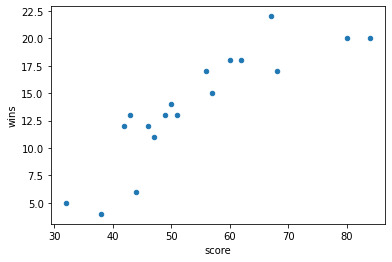

In [ ]:
data = pd.DataFrame({ 
  'score':[67, 84, 80, 60, 68, 62, 51, 47, 49, 50, 57, 43, 56, 46, 42, 32, 44, 38],
  'wins':[22, 20, 20, 18, 17, 18, 13, 11, 13, 14, 15, 13, 17, 12, 12, 5, 6, 4]
})
r = data.corr()['score']['wins']
print('相関係数：', r)
data.plot.scatter(x='score', y='wins')

In [ ]:
# 母相関係数が0の場合
print('H_0: 母相関係数 ρ = 0 である')
print('H_1: 母相関係数 ρ ≠ 0 である')
print('α = 0.05')

n = len(data['score'])
df = n - 2
t = r * np.sqrt(df) / np.sqrt(1-r**2)
t_a = sp.stats.t.ppf(0.975, df)
print(t, t_a)
if t > t_a:
  print('帰無仮説を棄却する（母相関係数 ρ ≠ 0 である）')
else:
  print('帰無仮説を棄却しない（母相関係数 ρ ≠ 0 でないといえない）')

H_0: 母相関係数 ρ = 0 である
H_1: 母相関係数 ρ ≠ 0 である
α = 0.05
7.051900754579296 2.1199052992210112
帰無仮説を棄却する（母相関係数 ρ ≠ 0 である）


In [ ]:
# 母相関係数が0でない場合
print('H_0: 母相関係数 ρ = 0.80 である')
print('H_1: 母相関係数 ρ ≠ 0.80 である')
print('α = 0.05')

rho = 0.80

# フィッシャーのz変換
z = 0.5 * np.log((1+r)/(1-r))
eta = 0.5 * np.log((1+rho)/(1-rho))

Z = np.sqrt(n-3) * (z - eta)

Z_a = sp.stats.norm.ppf(0.975, loc=0, scale=1)
print(Z, Z_a)

if Z > Z_a:
  print('帰無仮説を棄却する（母相関係数 ρ ≠ 0.80 である）')
else:
  print('帰無仮説を棄却しない（母相関係数 ρ ≠ 0.80 でないといえない）')

H_0: 母相関係数 ρ = 0.80 である
H_1: 母相関係数 ρ ≠ 0.80 である
α = 0.05
0.9051357275079721 1.959963984540054
帰無仮説を棄却しない（母相関係数 ρ ≠ 0.80 でないといえない）


## 12. Wilcoxsonの順位和検定

In [ ]:
# データに重複はないとする
x = [73, 62, 82, 78, 51, 90, 96, 80, 79, 68]
y = [80, 61, 85, 83, 49, 95, 93, 88, 75, 81]
print('f(x)を第1の母集団の分布とし、f(x-a)を第2の母集団の分布とするとき')
print('H_0: a = 0 である（両者の分布が同一である）')
print('H_1: a ≠ 0 である（両者の分布が同一でない）')
print('α = 0.05')

# Wilcoxsonの順位和検定の有意水準5%の両側検定における各値
wa_low = 49
wa_high = 87

sorted_xy_list = sorted(x + y)
xy_dict = {}
for i, j in enumerate(sorted_xy_list):
  xy_dict[j] = i + 1
print('順位：', xy_dict)

# Xiの順位の和W1
W1 = 0
for i in x:
  W1 += xy_dict[i]
print('順位和 W1 =', W1)


if W1 <= wa_low or W1 >= wa_high:
  print('帰無仮説を棄却する（両者の分布が同一でない）')
else:
  print('帰無仮説を棄却しない（両者の分布が同一でないといえない）')

f(x)を第1の母集団の分布とし、f(x-a)を第2の母集団の分布とするとき
H_0: a = 0 である（両者の分布が同一である）
H_1: a ≠ 0 である（両者の分布が同一でない）
α = 0.05
順位： {49: 1, 51: 2, 61: 3, 62: 4, 68: 5, 73: 6, 75: 7, 78: 8, 79: 9, 80: 11, 81: 12, 82: 13, 83: 14, 85: 15, 88: 16, 90: 17, 93: 18, 95: 19, 96: 20}
順位和 W1 = 95
帰無仮説を棄却する（両者の分布が同一でない）


# 13. Wilcoxsonの符号付順位検定

In [ ]:
# データに重複はないとする
x = [73, 62, 82, 78, 51, 90, 96, 80, 79, 68]
y = [80, 61, 85, 83, 49, 95, 93, 88, 75, 81]
print('f(x)を第1の母集団の分布とし、f(x-a)を第2の母集団の分布とするとき')
print('H_0: a = 0 である（両者の分布が同一である）')
print('H_1: a ≠ 0 である（両者の分布が同一でない）')
print('α = 0.05')

# Wilcoxsonの符号付順位和検定の有意水準5%の両側検定における各値
wa_low = 3
wa_high = 33

z = [y[i]-x[i] for i in range(len(x))]
print(z)
abs_z = [abs(y[i]-x[i]) for i in range(len(x))]
print(abs_z)

data = pd.DataFrame({ 
  'x':x,
  'y':y,
  '差':z,
  '絶対値':abs_z,
  '順位':[8,1,3.5,6.5,2,6.5,3.5,9,5,10]
})
data

f(x)を第1の母集団の分布とし、f(x-a)を第2の母集団の分布とするとき
H_0: a = 0 である（両者の分布が同一である）
H_1: a ≠ 0 である（両者の分布が同一でない）
α = 0.05
[7, -1, 3, 5, -2, 5, -3, 8, -4, 13]
[7, 1, 3, 5, 2, 5, 3, 8, 4, 13]


,x,y,差,絶対値,順位
0,73,80,7,7,8.0
1,62,61,-1,1,1.0
2,82,85,3,3,3.5
3,78,83,5,5,6.5
4,51,49,-2,2,2.0
5,90,95,5,5,6.5
6,96,93,-3,3,3.5
7,80,88,8,8,9.0
8,79,75,-4,4,5.0
9,68,81,13,13,10.0


In [ ]:
W_plus = 8 + 3.5 + 6.5 + 6.5 + 9 + 10
W_minus = 1 + 2 + 3.5 + 5
print(W_plus, W_minus)
if W_plus < W_minus:
  W2 = W_plus
else:
  W2 = W_minus

if W2 <= wa_low or W2 >= wa_high:
  print('帰無仮説を棄却する（両者の分布が同一でない）')
else:
  print('帰無仮説を棄却しない（両者の分布が同一でないといえない）')

43.5 11.5
帰無仮説を棄却しない（両者の分布が同一でないといえない）
